# **Manipulation de fichiers**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ouverture d'un fichier**

**Contexte : On a fait une expérience et on veut tracer Qv = Qv(N1)**

In [3]:
# syntaxe : open(chemin du fichier, mode)
# 3 modes d'ouverture
# r = read = ouverture du fichier en mode lecture
# w = write = ouverture du fichier en mode écriture
# a = append = si on veut ajouter du contenu en fin de fichier
# diff entre append et write :
# append permet de rajouter des lignes à la fin sans écraser à ce qu'il y a avant
# au contraire de write qui ne préserve pas ce qui a été enregistré avant
# Une fois qu’on a terminé de manipuler un fichier, il est considéré comme une bonne pratique de le fermer. 
# Cela évite d’utiliser des ressources inutilement et d’obtenir certains comportements inattendus.

fichier = open("RésultatsTP.csv", "r")
lignes = fichier.readlines() # lignes contient toutes les lignes de notre fichier
fichier.close() #une fois qu'on a récupéré les lignes de notre fichier on le ferme

In [4]:
lignes[0] #n'utilisez pas print pour voir les lignes car print "nettoie" les impuretés  

'Qv,N1,N2,C1,C2\n'

In [5]:
lignes[1]

'l/min,1/min,,Nm,\n'

In [6]:
lignes[2]

'0,-3.125,-1.5625,0.0684,0\n'

In [7]:
type(lignes[0])

str

**Nettoyage des lignes**

In [8]:
#On va utiliser les fonctions spécifiques aux string
# Pas besoin de retravailler les 2 premières lignes
# Je veux récupérer deux listes de nombres

new_lignes = []
for ligne in lignes[2:]:
    ligne = ligne.strip('\n') # strip élimine à la fin et au début l'argument (ici : /n) 
    ligne = ligne.split(',')
    new_lignes.append(ligne)
new_lignes = np.array(new_lignes)

In [9]:
new_lignes[2]

array(['8.7891', '1501.5625', '2210.9375', '0.752', '1.0547'], dtype='<U9')

**Extraction des valeurs de Qv et N1**

In [10]:
Qv = new_lignes[:,0]
N1 = new_lignes[:,1]

print(Qv) #ce sont des tableau 1-D pas des listes !
print(N1)
print(type(Qv))

['0' '2.6855' '8.7891' '15.625' '25.1465' '41.748' '45.4102' '55.6641'
 '68.1152' '74.707' '85.9375' '99.1211' '105.957' '117.9199' '124.7559'
 '137.4512' '142.0898' '152.832' '166.5039' '181.3965']
['-3.125' '1500' '1501.5625' '1501.5625' '1500' '1501.5625' '1500' '1500'
 '1503.125' '1500' '1503.125' '1501.5625' '1501.5625' '1501.5625' '1500'
 '1501.5625' '1501.5625' '1503.125' '1503.125' '1501.5625']
<class 'numpy.ndarray'>


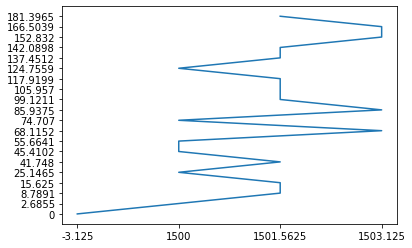

In [11]:
plt.plot(N1, Qv)
plt.show()

**Contexte : On veut rajouter des valeurs**

In [12]:
# Avec cette syntaxe, le fichier se ferme automatiquementù
# la nouvelle ligne s'ajoute en fin de fichier sans toucher au reste du fichier
new_line = "1,2,3,6,4\n"
with open('RésultatsTP.csv','a') as tp:
    tp.write(new_line)


In [13]:
with open('RésultatsTP.csv','r') as tp:
    print(tp.readlines())

['Qv,N1,N2,C1,C2\n', 'l/min,1/min,,Nm,\n', '0,-3.125,-1.5625,0.0684,0\n', '2.6855,1500,2212.5,0.8008,1.0254\n', '8.7891,1501.5625,2210.9375,0.752,1.0547\n', '15.625,1501.5625,2209.375,0.8154,1.084\n', '25.1465,1500,2212.5,0.8057,1.1426\n', '41.748,1501.5625,2209.375,0.8105,1.2598\n', '45.4102,1500,2206.25,0.8057,1.2598\n', '55.6641,1500,2207.8125,0.8008,1.3184\n', '68.1152,1503.125,2203.125,0.7422,1.4136\n', '74.707,1500,2207.8125,0.7666,1.4209\n', '85.9375,1503.125,2203.125,0.7471,1.4941\n', '99.1211,1501.5625,2201.5625,0.8154,1.5601\n', '105.957,1501.5625,2201.5625,0.7764,1.5894\n', '117.9199,1501.5625,2200,0.8008,1.6479\n', '124.7559,1500,2200,0.7812,1.6699\n', '137.4512,1501.5625,2200,0.752,1.7212\n', '142.0898,1501.5625,2198.4375,0.8057,1.7285\n', '152.832,1503.125,2200,0.7715,1.7798\n', '166.5039,1503.125,2201.5625,0.7959,1.8018\n', '181.3965,1501.5625,2198.4375,0.7812,1.8384\n', '1,2,3,6,4\n']


In [14]:
#si on utilise write :
# on a écrasé tout notre fichier, il ne reste plus rien
new_line = "1,2,3,6,4\n"
with open('RésultatsTP.csv','w') as tp:
    tp.write(new_line)

In [15]:
with open('RésultatsTP.csv','r') as tp:
    print(tp.readlines())

['1,2,3,6,4\n']
